<a href="https://colab.research.google.com/github/MikelBarajas38/MachineLearning/blob/main/ClusteringComp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparative Analysis of Clustering Algorithms**

## Machine Learning
### Mikel Ignacio Barajas Martínez

Ingeniería en Sistemas Inteligentes, 2021, 336483, 202102300012 \
Machine Learning, 281601

### 05/05/24

𝝮

In [2]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=c2e353dfc9baaa1d7677e605c78527dd92b2bf513c61c1462bb4f8acf55ecd5d
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# data generation
from sklearn.datasets import make_blobs

# k-means
from sklearn.cluster import KMeans

# E-M
from sklearn import mixture
from scipy import linalg
import itertools

# SOM
# import simpsom as sps
from minisom import MiniSom

#evaluation
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.metrics import accuracy_score

## **Abstract**

This notebook compares the performance of three different clustering algorithms: K-means, Expectation-Maximization (E-M) and Self-Organizing Maps, by testing them with four different samples of generated data and evaluating the results visually.

## **Introduction**

K-means clustering is a method for finding clusters and cluster centers in a set of unlabeled data. One chooses the desired number of cluster centers, say $R$, and the K-means procedure iteratively moves the centers to minimize the total within cluster variance. Given an initial set of centers, the K-means algorithm alternates the two steps:

- for each center we identify the subset of training points (its cluster) that is closer to it than any other center.

- the means of each feature for the data points in each cluster are
computed, and this mean vector becomes the new center for that
cluster.

These two steps are iterated until convergence. Typically the initial centers are $R$ randomly chosen observations from the training data (Hastie et al., 2008).

Expectation-maximization (EM) is a method to find the maximum likelihood estimator of a parameter $\theta$ of a probability
distribution.

A Self-Organizing Map, or SOM, falls under the rare domain of unsupervised learning in Neural Networks. Its essentially a grid of neurons, each denoting one cluster learned during training. Traditionally speaking, there is no concept of neuron locations in ANNs. However, in an SOM, each neuron has a location, and neurons that lie close to each other represent clusters with similar properties. Each neuron has a weightage vector, which is equal to the centroid of its particular cluster.

## Data Generation

In [4]:
n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Anisotropic blobs
X_aniso = np.dot(X, transformation)

# Unequal variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# Unevenly sized blobs
X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
)
y_filtered = [0] * 500 + [1] * 100 + [2] * 10

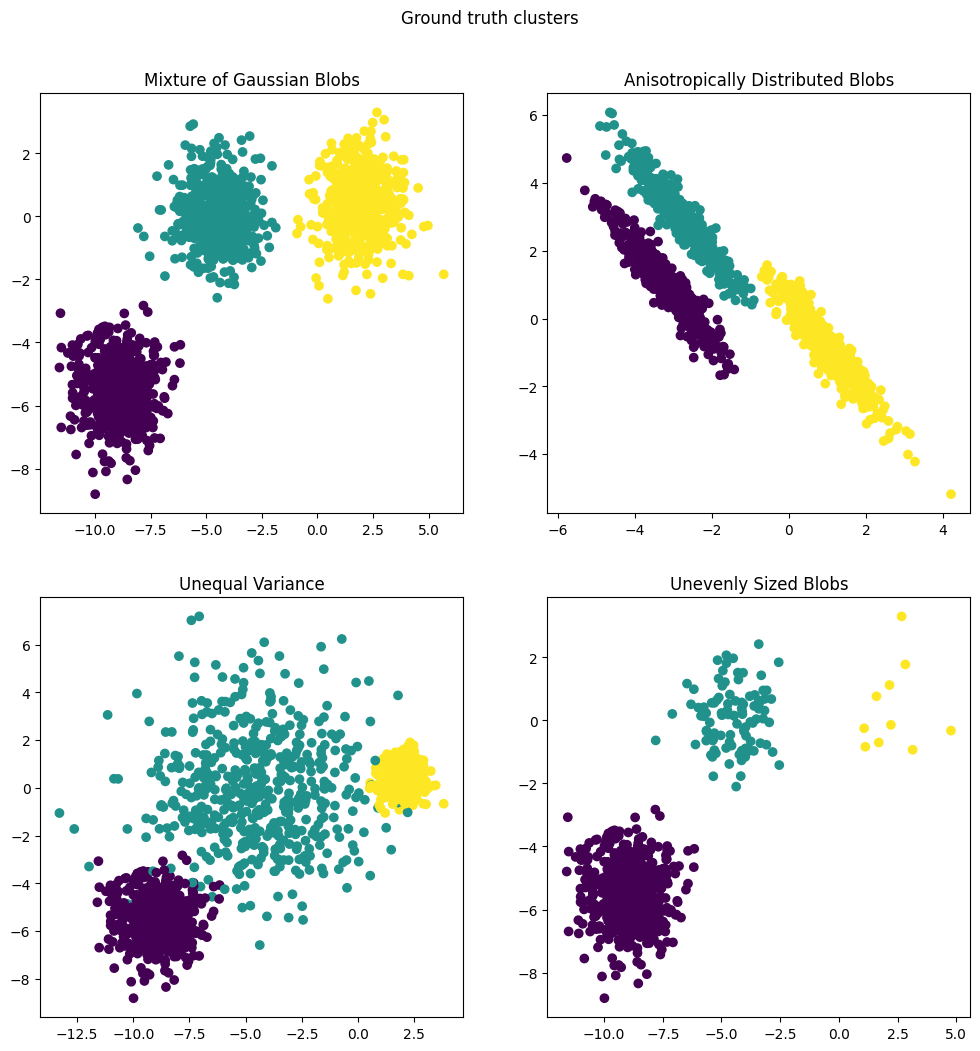

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

axs[0, 0].scatter(X[:, 0], X[:, 1], c=y)
axs[0, 0].set_title("Mixture of Gaussian Blobs")

axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
axs[1, 0].set_title("Unequal Variance")

axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

## **K-means**

### Utils

In [6]:
def get_kmeans_ypred(X, n_clusters, params):
    y_pred = KMeans(n_clusters, **params).fit_predict(X)
    return y_pred

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}

### K = 2

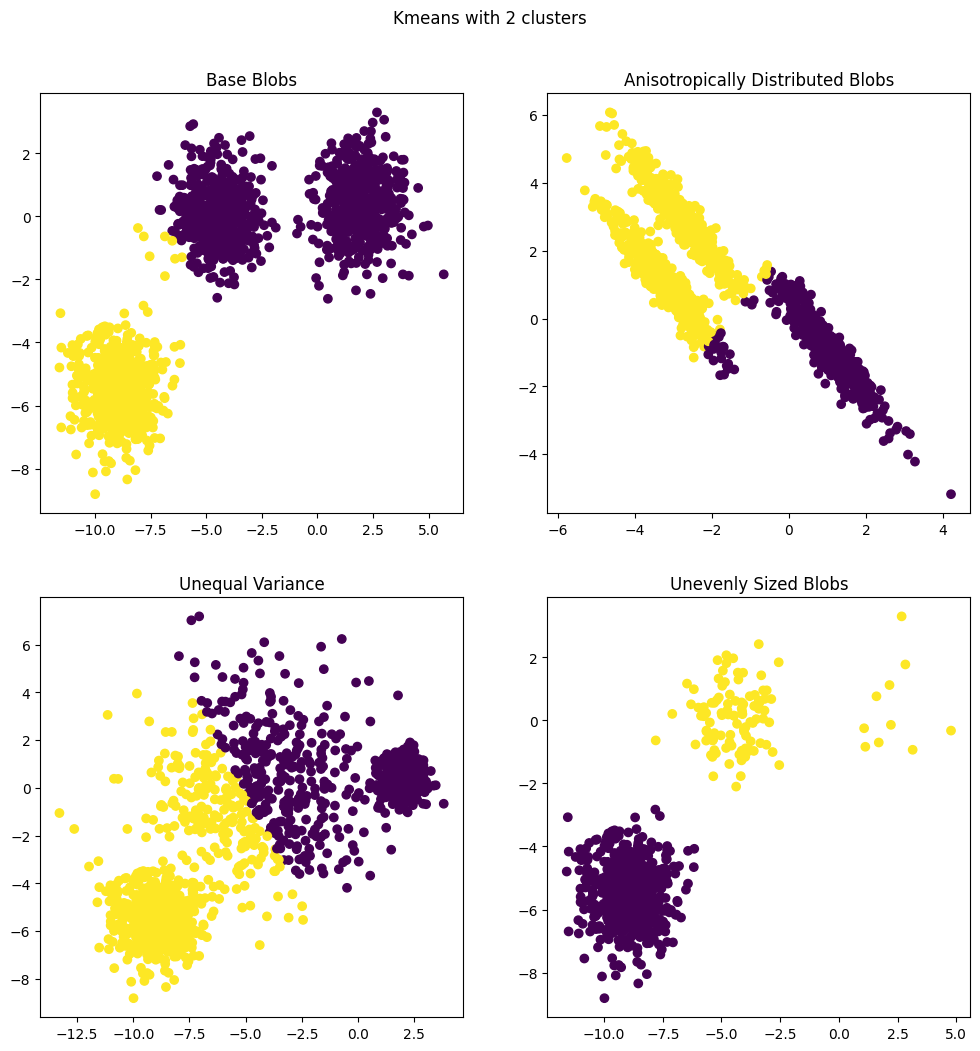

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

y_pred = get_kmeans_ypred(X, 2, common_params)
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0, 0].set_title("Base Blobs")

y_pred = get_kmeans_ypred(X_aniso, 2, common_params)
axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

y_pred = get_kmeans_ypred(X_varied, 2, common_params)
axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
axs[1, 0].set_title("Unequal Variance")

y_pred = get_kmeans_ypred(X_filtered, 2, common_params)
axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Kmeans with 2 clusters").set_y(0.95)
plt.show()

### K = 3

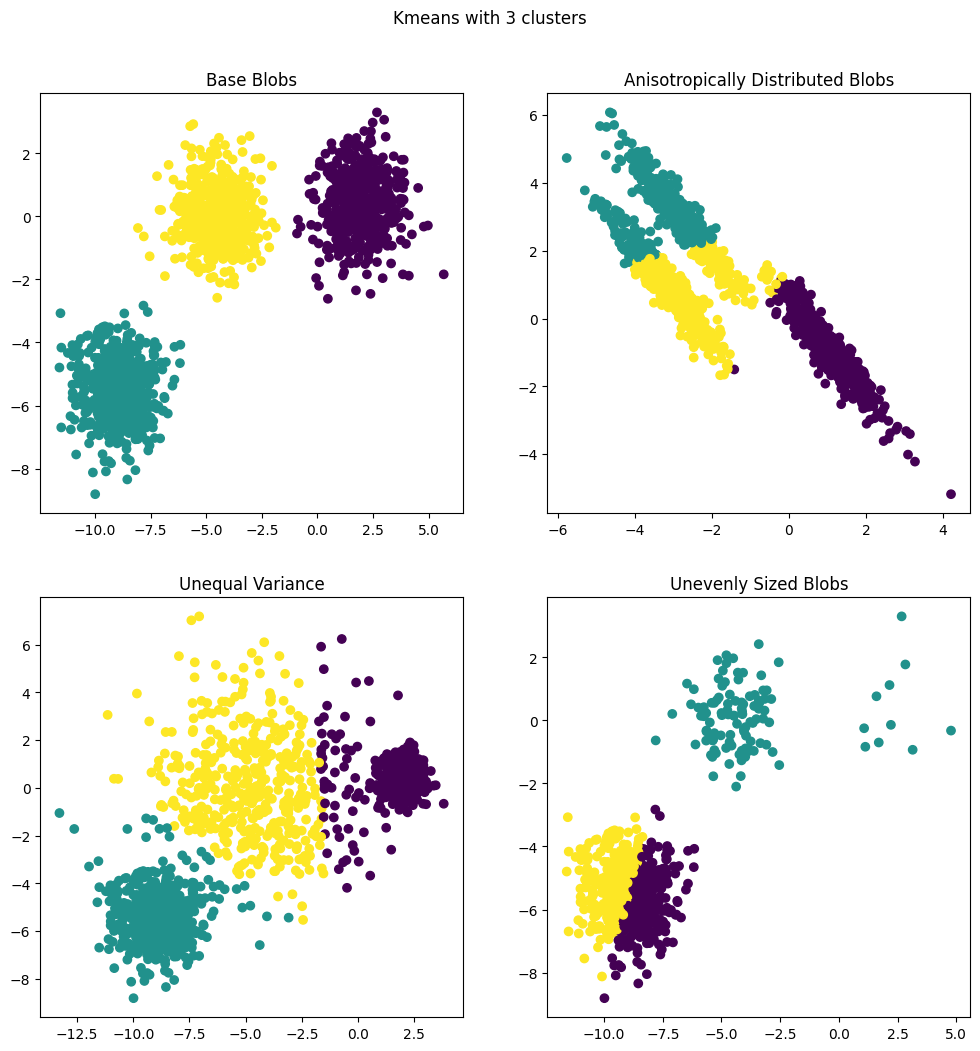

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

y_pred = get_kmeans_ypred(X, 3, common_params)
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0, 0].set_title("Base Blobs")

y_pred = get_kmeans_ypred(X_aniso, 3, common_params)
axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

y_pred = get_kmeans_ypred(X_varied, 3, common_params)
axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
axs[1, 0].set_title("Unequal Variance")

y_pred = get_kmeans_ypred(X_filtered, 3, common_params)
axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Kmeans with 3 clusters").set_y(0.95)
plt.show()

### K = 4

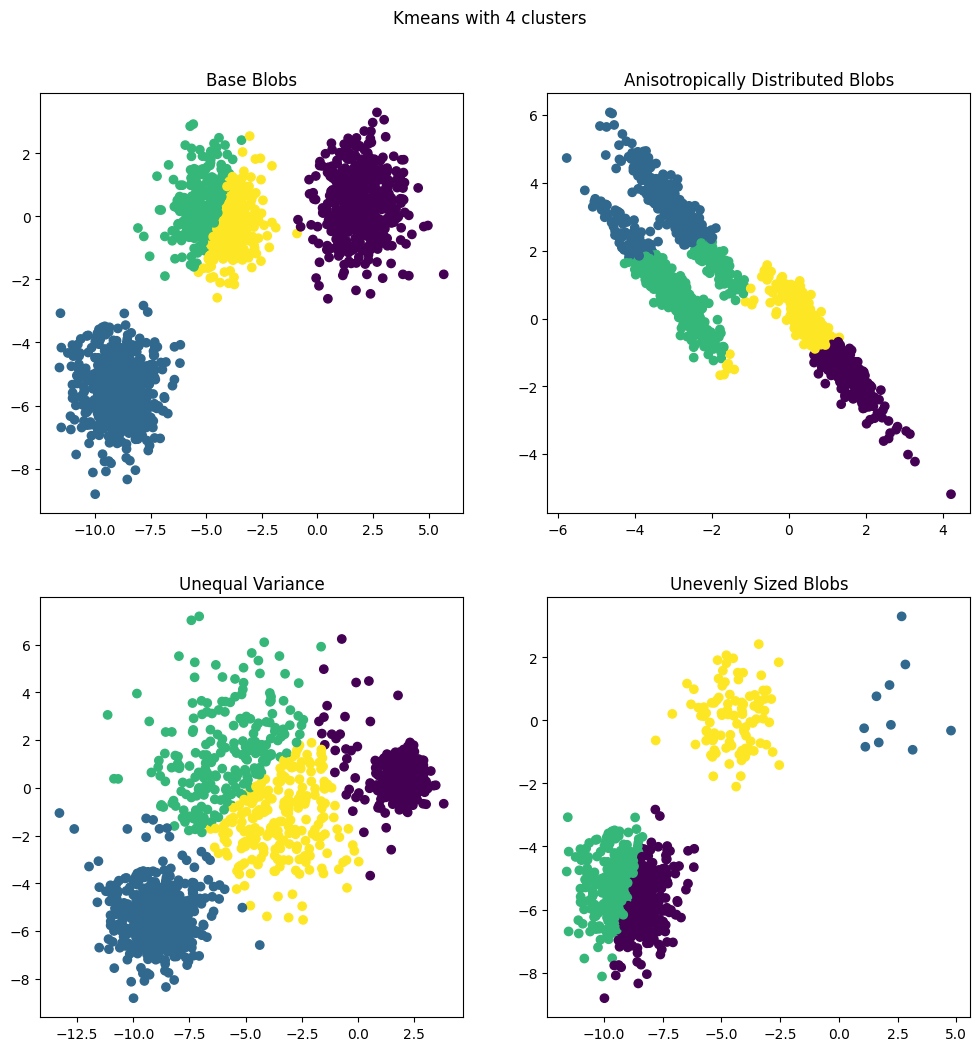

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

y_pred = get_kmeans_ypred(X, 4, common_params)
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0, 0].set_title("Base Blobs")

y_pred = get_kmeans_ypred(X_aniso, 4, common_params)
axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

y_pred = get_kmeans_ypred(X_varied, 4, common_params)
axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
axs[1, 0].set_title("Unequal Variance")

y_pred = get_kmeans_ypred(X_filtered, 4, common_params)
axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Kmeans with 4 clusters").set_y(0.95)
plt.show()

### Silhouette analysis evaluation



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6277375237710934


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.7333423486262539
For n_clusters = 4 The average silhouette_score is : 0.5865849155732252


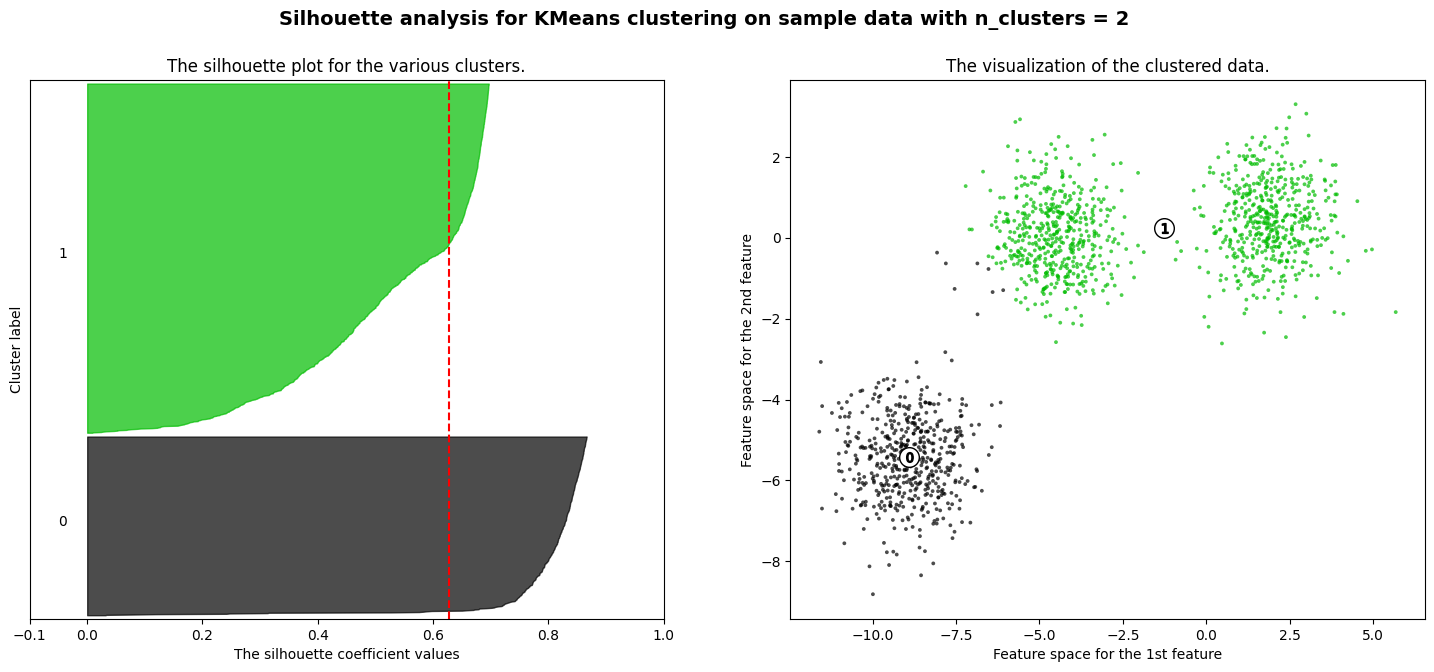

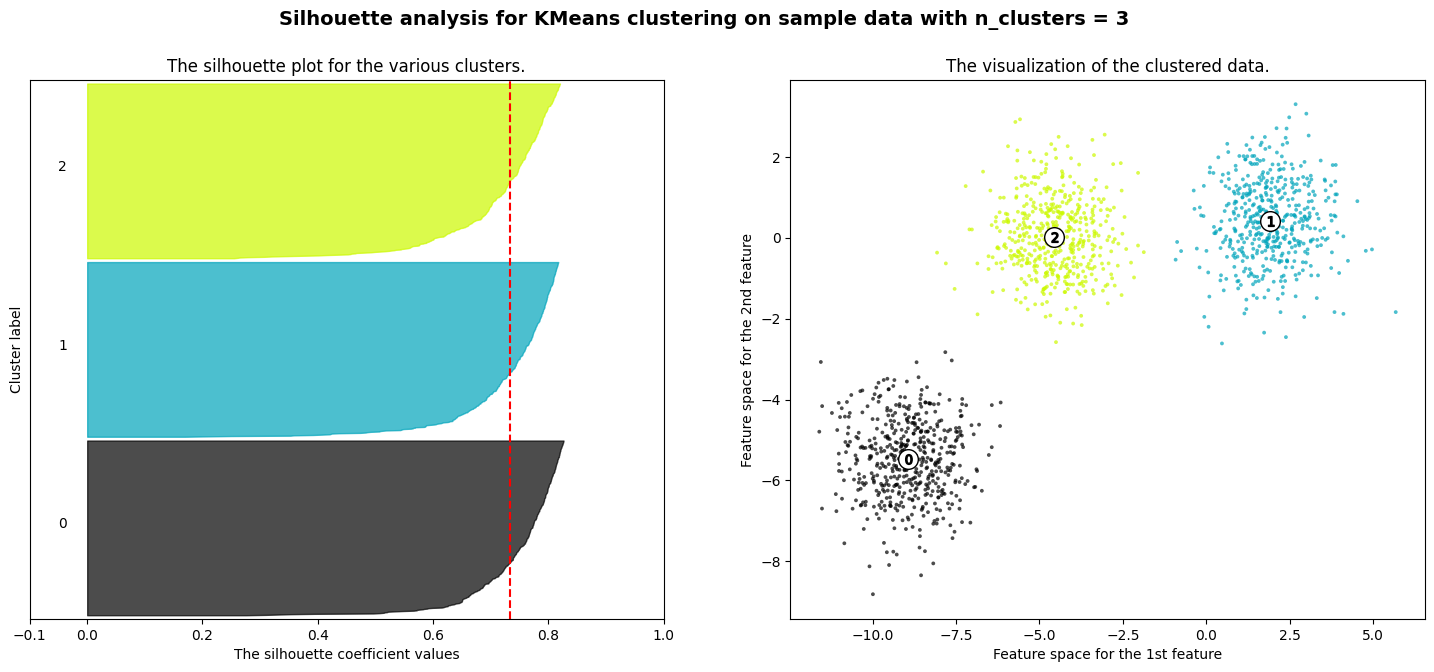

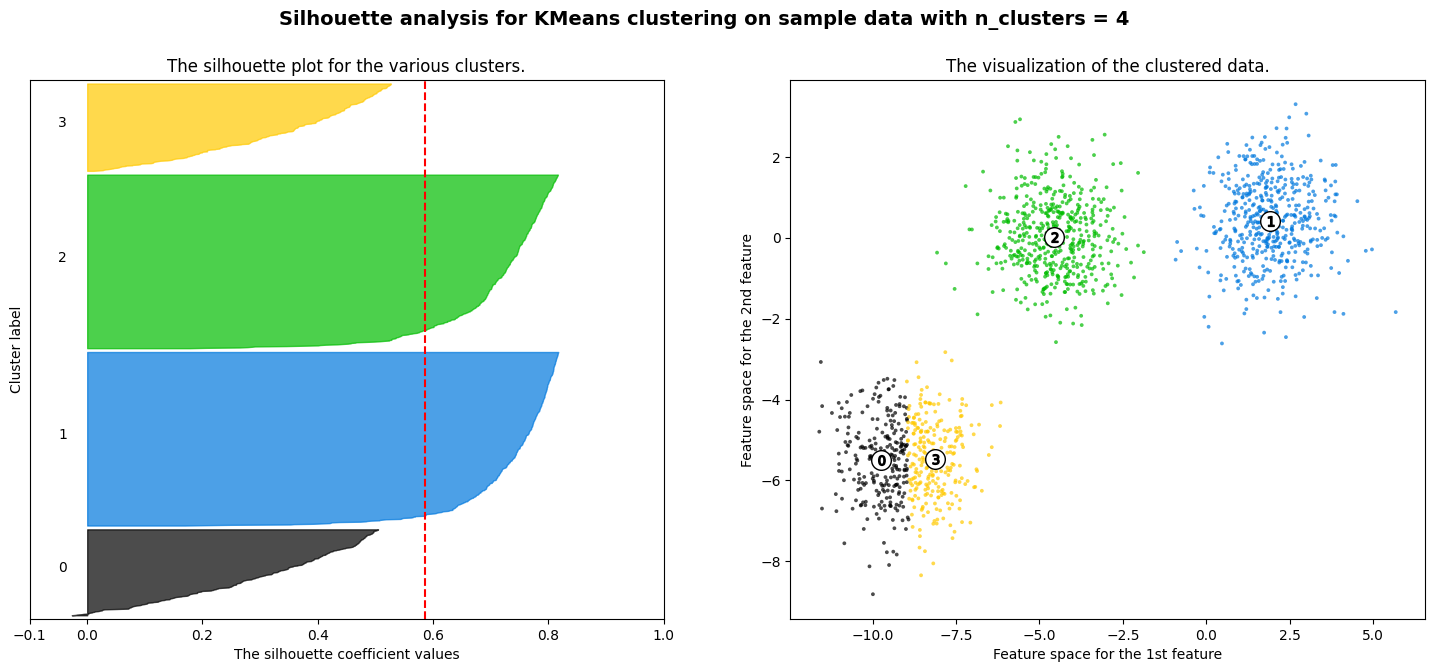

In [10]:
range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## **Expectation-Maximization**

### Examples

In [11]:
color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])

def plot_results(X, Y, means, covariances, index, title):
    print(Y)
    splot = plt.subplot(1, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y == i):
            continue
        plt.scatter(X[Y == i, 0], X[Y == i, 1], 0.8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.title(title)
    plt.xticks(())
    plt.yticks(())

def plot_results_axis(X, gmm, axis, index = 0):

    Y = gmm.predict(X)
    means = gmm.means_
    covariances = gmm.covariances_

    #splot = axis.subplot(1, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y == i):
            continue
        axis.scatter(X[Y == i, 0], X[Y == i, 1], 0.8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
        ell.set_alpha(0.5)
        axis.add_patch(ell)

[0 0 2 ... 1 1 1]


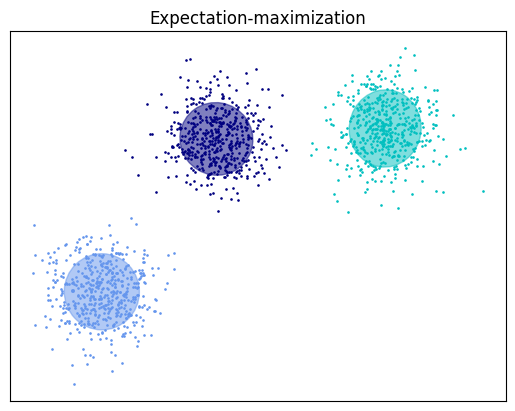

In [12]:
gmm = mixture.GaussianMixture(
    n_components=3, covariance_type="full", max_iter=100
).fit(X)
plot_results(
    X, gmm.predict(X), gmm.means_, gmm.covariances_, 0, "Expectation-maximization"
)

### Utils

In [13]:
def get_em(X, n_clusters, covariance = 'full'):
    gmm = mixture.GaussianMixture(n_components = n_clusters, covariance_type = covariance, max_iter=100).fit(X)
    return gmm

def get_em_ypred(X, n_clusters, covariance = 'full'):
    gmm = mixture.GaussianMixture(n_components = n_clusters, covariance_type = covariance, max_iter=100).fit(X)
    return gmm.predict(X)

### 2 components

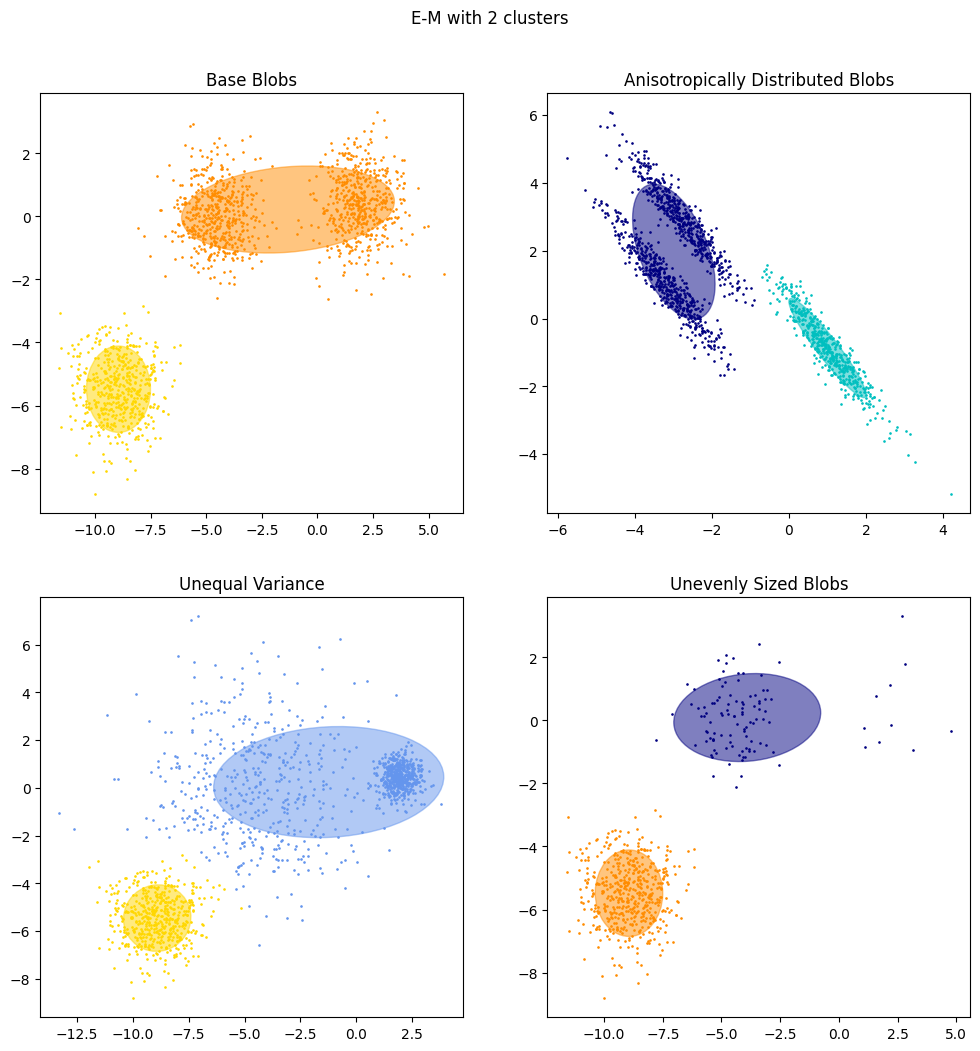

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

gmm = get_em(X, 2)
plot_results_axis(X, gmm, axs[0,0])
axs[0, 0].set_title("Base Blobs")

gmm = get_em(X_aniso, 2)
plot_results_axis(X_aniso, gmm, axs[0,1])
axs[0, 1].set_title("Anisotropically Distributed Blobs")

gmm = get_em(X_varied, 2)
plot_results_axis(X_varied, gmm, axs[1,0])
axs[1, 0].set_title("Unequal Variance")

gmm = get_em(X_filtered, 2)
plot_results_axis(X_filtered, gmm, axs[1,1])
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("E-M with 2 clusters").set_y(0.95)
plt.show()

### 3 components


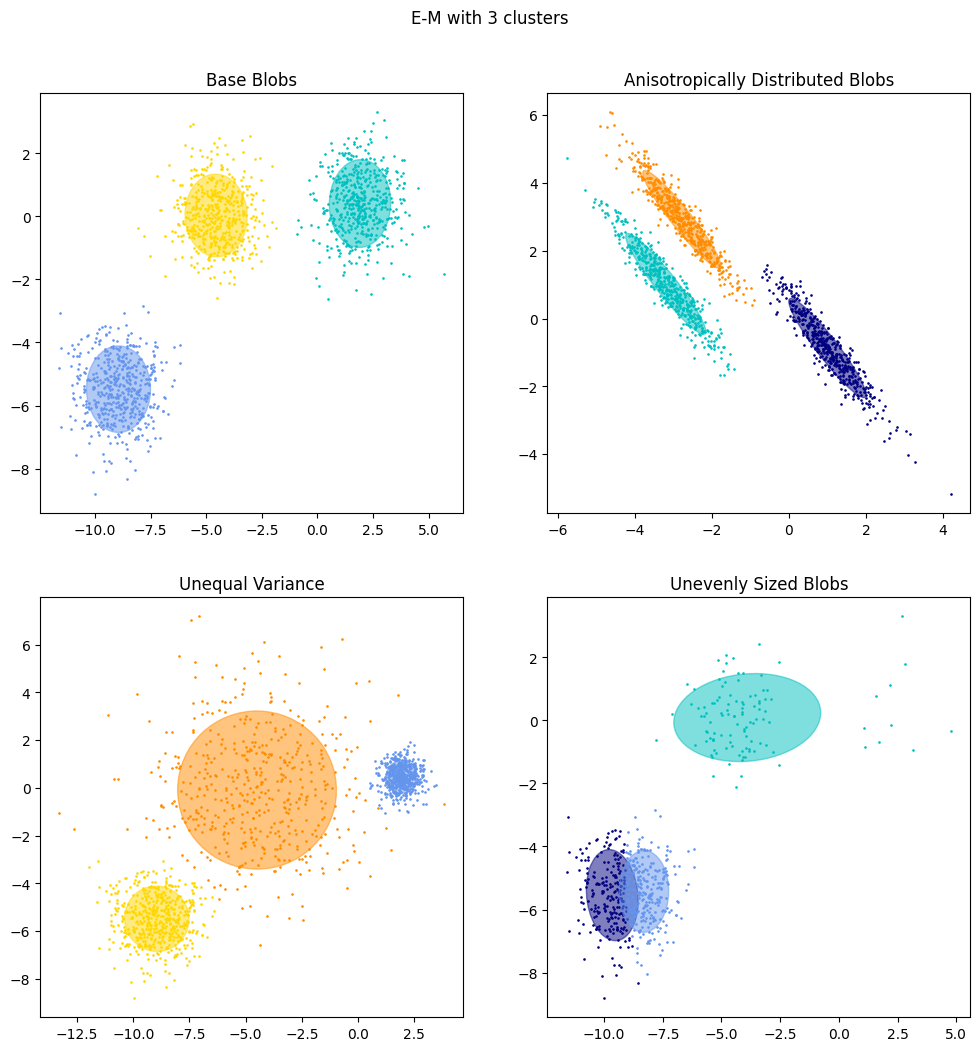

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

gmm = get_em(X, 3)
plot_results_axis(X, gmm, axs[0,0])
axs[0, 0].set_title("Base Blobs")

gmm = get_em(X_aniso, 3)
plot_results_axis(X_aniso, gmm, axs[0,1])
axs[0, 1].set_title("Anisotropically Distributed Blobs")

gmm = get_em(X_varied, 3)
plot_results_axis(X_varied, gmm, axs[1,0])
axs[1, 0].set_title("Unequal Variance")

gmm = get_em(X_filtered, 3)
plot_results_axis(X_filtered, gmm, axs[1,1])
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("E-M with 3 clusters").set_y(0.95)
plt.show()

### 4 components

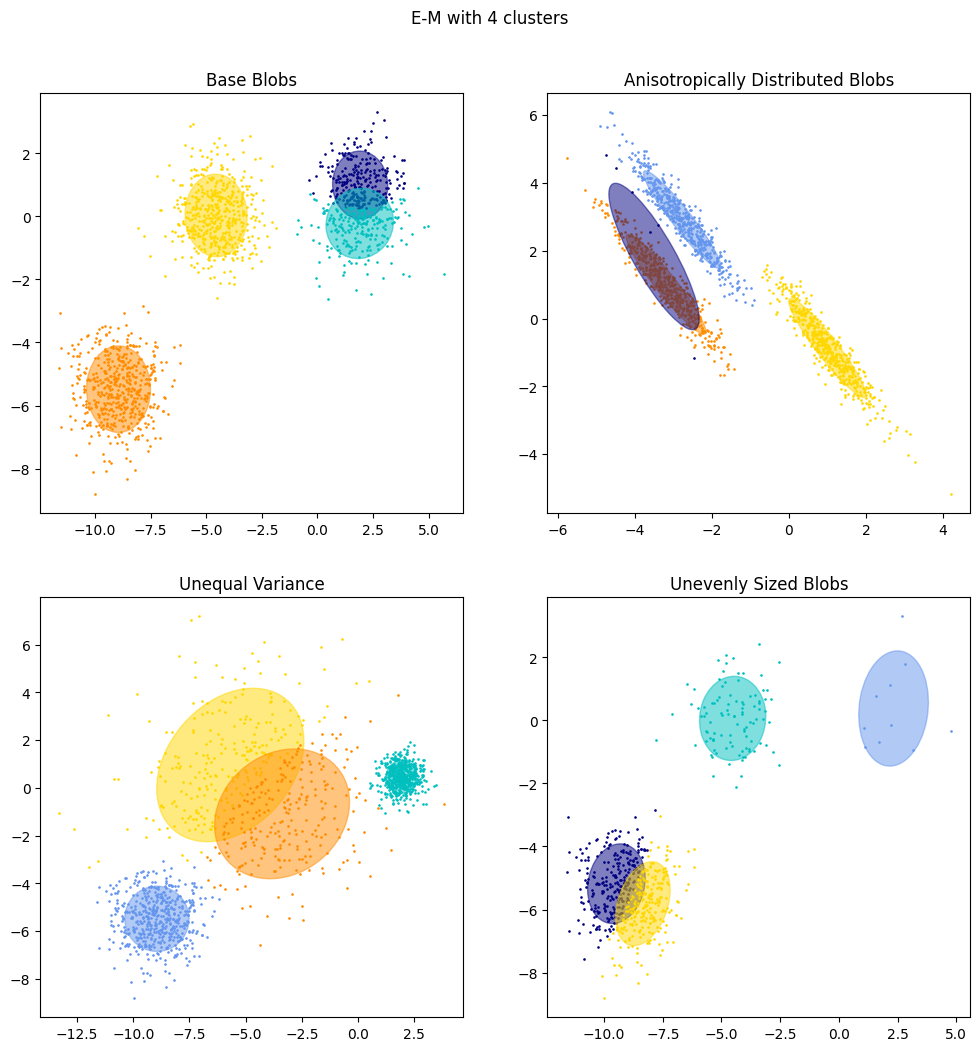

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

gmm = get_em(X, 4)
plot_results_axis(X, gmm, axs[0,0])
axs[0, 0].set_title("Base Blobs")

gmm = get_em(X_aniso, 4)
plot_results_axis(X_aniso, gmm, axs[0,1])
axs[0, 1].set_title("Anisotropically Distributed Blobs")

gmm = get_em(X_varied, 4)
plot_results_axis(X_varied, gmm, axs[1,0])
axs[1, 0].set_title("Unequal Variance")

gmm = get_em(X_filtered, 4)
plot_results_axis(X_filtered, gmm, axs[1,1])
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("E-M with 4 clusters").set_y(0.95)
plt.show()

## **Self-Organizing Maps**



### Examples

In [17]:
# taken from https://github.com/JustGlowing/minisom/blob/master/examples/Clustering.ipynb

In [18]:
som = MiniSom(1, 3, 2, sigma=0.3, learning_rate=0.5, neighborhood_function='gaussian')
som.train(X, 500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 1.246802381297957


In [19]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in X]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, (1, 3))

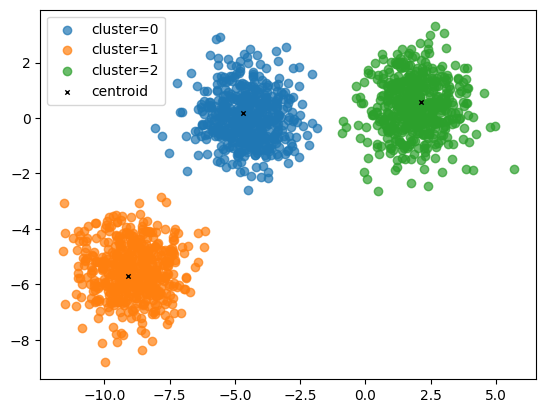

In [20]:
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(X[cluster_index == c, 0],
                X[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',
                s=10, linewidths=1, color='k', label='centroid')
plt.legend();

### Utils

In [21]:
def get_som_ypred(X, n_clusters):
    som = MiniSom(1, n_clusters, 2, sigma=0.3, learning_rate=0.5, neighborhood_function='gaussian')
    som.train(X, 500)
    winner_coordinates = np.array([som.winner(x) for x in X]).T
    y_pred = np.ravel_multi_index(winner_coordinates, (1, n_clusters))
    return y_pred

### 2 Clusters

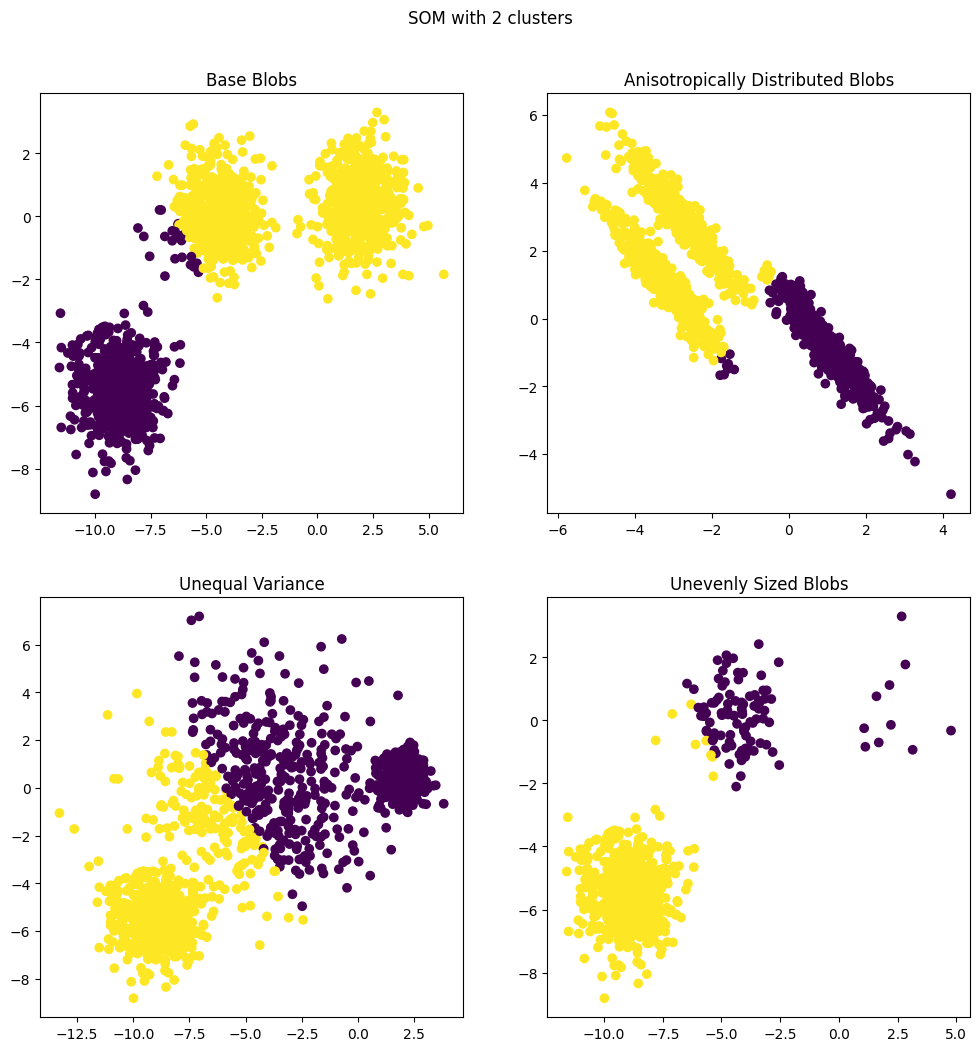

In [22]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

y_pred = get_som_ypred(X, 2)
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0, 0].set_title("Base Blobs")

y_pred = get_som_ypred(X_aniso, 2)
axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

y_pred = get_som_ypred(X_varied, 2)
axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
axs[1, 0].set_title("Unequal Variance")

y_pred = get_som_ypred(X_filtered, 2)
axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("SOM with 2 clusters").set_y(0.95)
plt.show()

### 3 Clusters

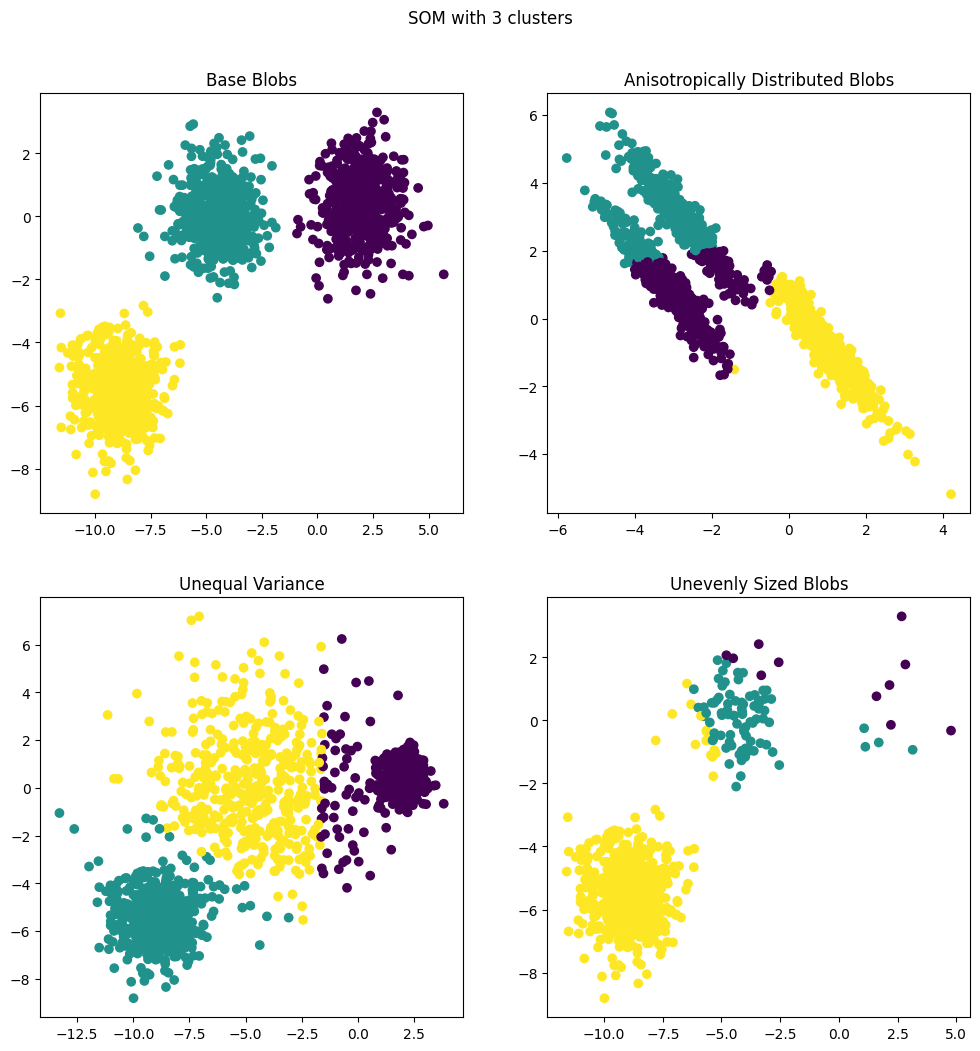

In [23]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

y_pred = get_som_ypred(X, 3)
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0, 0].set_title("Base Blobs")

y_pred = get_som_ypred(X_aniso, 3)
axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

y_pred = get_som_ypred(X_varied, 3)
axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
axs[1, 0].set_title("Unequal Variance")

y_pred = get_som_ypred(X_filtered, 3)
axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("SOM with 3 clusters").set_y(0.95)
plt.show()

### 4 clusters

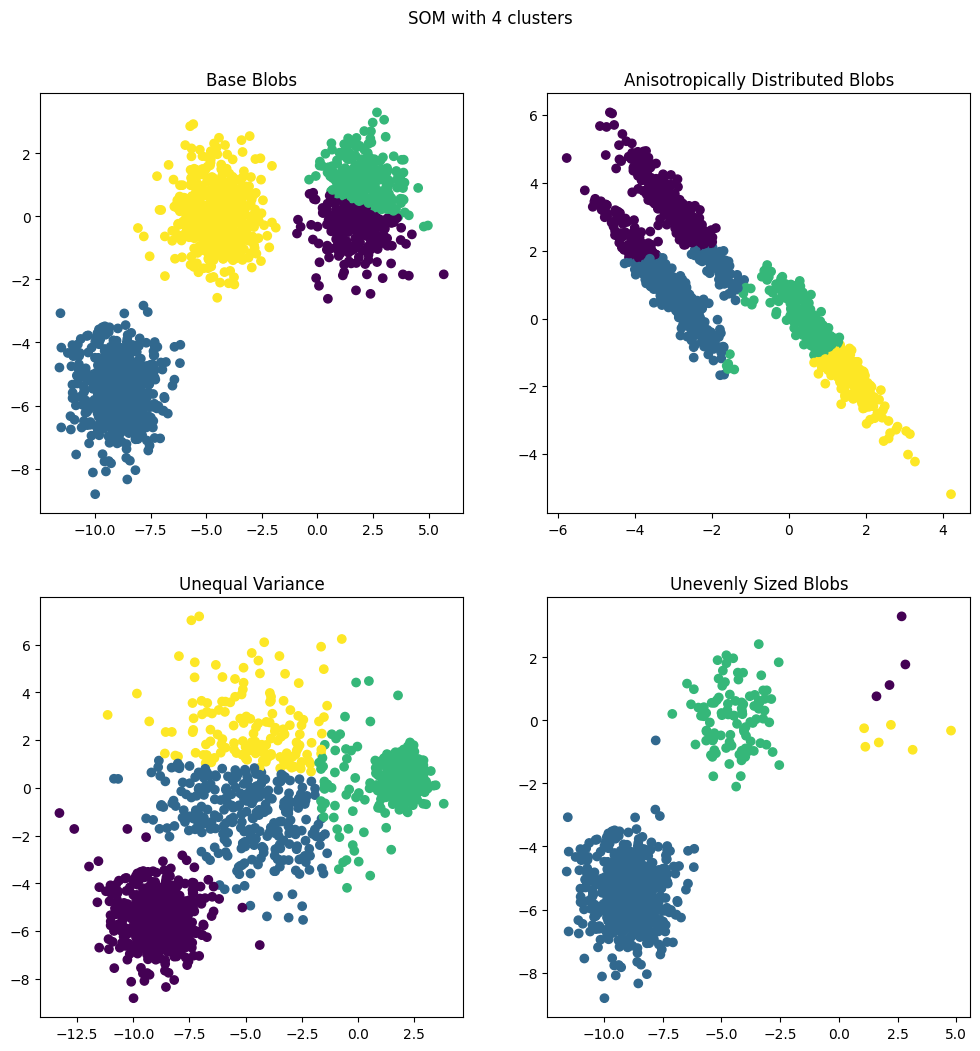

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

y_pred = get_som_ypred(X, 4)
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0, 0].set_title("Base Blobs")

y_pred = get_som_ypred(X_aniso, 4)
axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

y_pred = get_som_ypred(X_varied, 4)
axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
axs[1, 0].set_title("Unequal Variance")

y_pred = get_som_ypred(X_filtered, 4)
axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("SOM with 4 clusters").set_y(0.95)
plt.show()

## **Results**

From observation alone, one could easily find that the optimal number of clusters is 3, given how the data "naturally" forms three clusters given the parameters used to generate it. Still, this observation could be supported through the use of a more rigorous method, such as simple analysis.

The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like the number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters, and negative values indicate that those samples might have been assigned to the wrong cluster.

In this case, 3 clusters give the silluethes that are closer to the mean and which have the most similar sizes relative to each other.

Using three clusters, E-M performs better overall, being able to handle both anisotropically distributed blobs and blobs with unequal variance with ease (unlike K-means). SOM performsa bit better than K-means, but still only bbeatsE-M in the unevenly sized blobs (filtered) category.

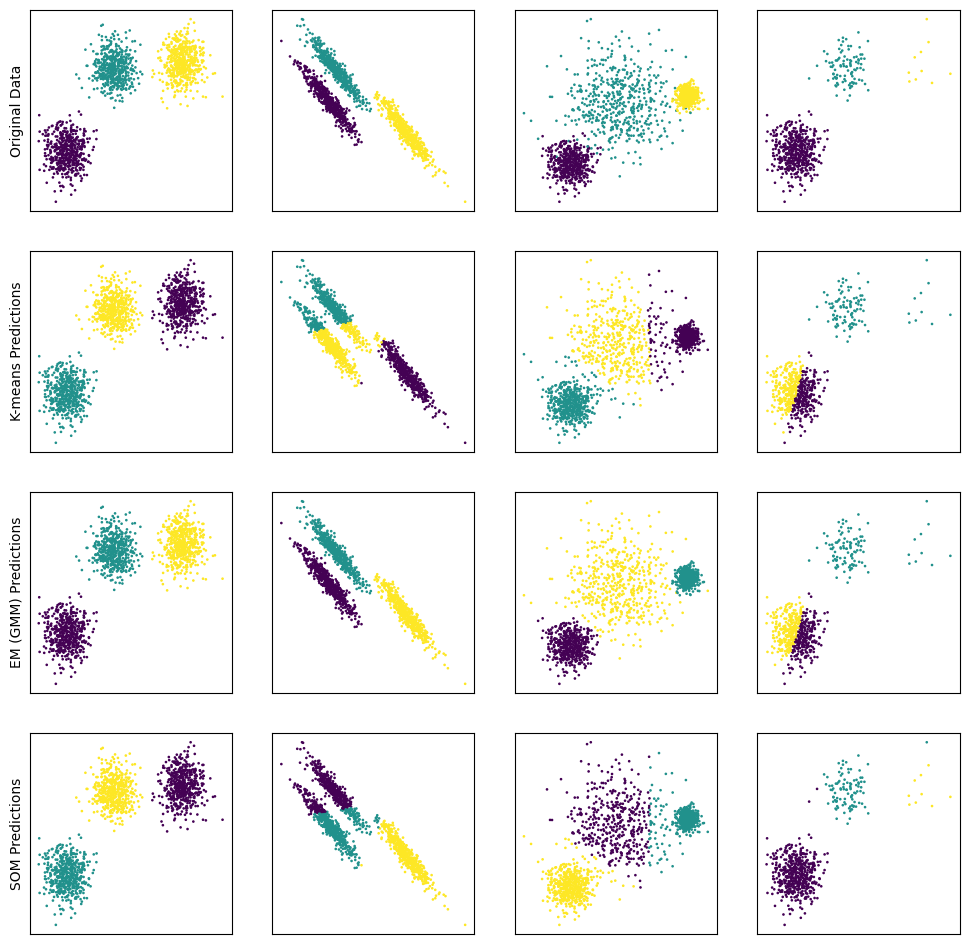

In [25]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

Xs = [X, X_aniso, X_varied, X_filtered]
Ys = [y, y, y_varied, y_filtered]
marker_size = 0.8

for i in range(len(Xs)):

    axs[0, i].scatter(Xs[i][:, 0], Xs[i][:, 1], c=Ys[i], s = marker_size)
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])

    y_pred1 = get_kmeans_ypred(Xs[i], 3, common_params)
    axs[1, i].scatter(Xs[i][:, 0], Xs[i][:, 1], c=y_pred1, s = marker_size)
    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])

    y_pred2 = get_em_ypred(Xs[i], 3)
    axs[2, i].scatter(Xs[i][:, 0], Xs[i][:, 1], c=y_pred2, s = marker_size)
    axs[2, i].set_xticks([])
    axs[2, i].set_yticks([])

    y_pred3 = get_som_ypred(Xs[i], 3)
    axs[3, i].scatter(Xs[i][:, 0], Xs[i][:, 1], c=y_pred3, s = marker_size)
    axs[3, i].set_xticks([])
    axs[3, i].set_yticks([])


axs[0, 0].set_ylabel('Original Data')
axs[1, 0].set_ylabel('K-means Predictions')
axs[2, 0].set_ylabel('EM (GMM) Predictions')
axs[3, 0].set_ylabel('SOM Predictions')

plt.show()

### Accuracy (BAD IDEA)

Most clustering algorithms are used for unsupervised tasks, so this approach does not make a lot of sense. Still, the idea is to use a dict to find the most common matches and change the label accordingly.

In [26]:
# TODO: align predictions (is it even worth it?)

algorithms = [
    'K-means',
    'E-M'
]

normal_preds = [
    get_kmeans_ypred(X, 3, common_params),
    get_em_ypred(X, 3)
]

aniso_preds = [
    get_kmeans_ypred(X_aniso, 3, common_params),
    get_em_ypred(X_aniso, 3)
]

varied_preds = [
    get_kmeans_ypred(X_varied, 3, common_params),
    get_em_ypred(X_varied, 3)
]

filtered_preds = [
    get_kmeans_ypred(X_filtered, 3, common_params),
    get_em_ypred(X_filtered, 3)
]

data = {
    'Algorithm': algorithms,
    'Base blobs accuracy': [accuracy_score(y, pred) for pred in normal_preds],
    'Anisotropic blobs accuracy': [accuracy_score(y, pred) for pred in aniso_preds],
    'Unequal variance accuracy': [accuracy_score(y_varied, pred) for pred in varied_preds],
    'Unevenly sized blobs accuracy': [accuracy_score(y_filtered, pred) for pred in filtered_preds]
}

results = pd.DataFrame(data)

In [27]:
results

,Algorithm,Base blobs accuracy,Anisotropic blobs accuracy,Unequal variance accuracy,Unevenly sized blobs accuracy
0,K-means,0.000000,0.262,0.019333,0.572131
1,E-M,0.333333,0.000,0.333333,0.572131


## **Conclusions**

While E-M was the best-performing algorithm, one must still remember that this experiment is not universally applicable and that multiple methods should be tested for a real-world application. Additionally, K-means converges faster, so it may be better suited for some applications. SOM performance should also be judged considering the low dimensionality of the model used, and for more complex data (and a better fitting experiment), these may be substantially better.

## **References**

Hastie, T., Tibshirani, R., Friedman, R. (2008). The Elements of
Statistical Learning: Data Mining, Inference, and Prediction. Springer.